## Resources

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [2]:
import functions as fn

# See functions.py to see how the data is cleaned

df = fn.import_and_clean_data('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,age,state,bath_to_bed,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,52,Washington,0.250000,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,71,Washington,0.500000,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,65,Washington,0.333333,98178
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,73,Washington,0.500000,98133
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220,70,Washington,1.000000,98166


## EDA

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age', 'state', 'bath_to_bed',
       'zip'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12832 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12832 non-null  int64  
 1   date           12832 non-null  object 
 2   price          12832 non-null  float64
 3   bedrooms       12832 non-null  int64  
 4   bathrooms      12832 non-null  float64
 5   sqft_living    12832 non-null  int64  
 6   sqft_lot       12832 non-null  int64  
 7   floors         12832 non-null  float64
 8   waterfront     12832 non-null  object 
 9   greenbelt      12832 non-null  object 
 10  nuisance       12832 non-null  object 
 11  view           12832 non-null  object 
 12  condition      12832 non-null  int64  
 13  grade          12832 non-null  int64  
 14  heat_source    12832 non-null  object 
 15  sewer_system   12832 non-null  object 
 16  sqft_above     12832 non-null  int64  
 17  sqft_basement  12832 non-null  int64  
 18  sqft_g

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,1.283200e+04,1.283200e+04,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.00000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000
mean,4.461447e+09,9.343150e+05,3.241116,1.851621,1726.036393,10301.686721,1.196150,3.680486,6.997117,1385.53538,574.179161,171.159523,157.014963,1945.083463,171.836736,47.564903,-122.271882,75.916537,0.585997
std,2.820651e+09,5.213920e+05,0.997073,0.770884,683.237186,12516.420694,0.355851,0.789120,0.845610,499.36629,547.639318,214.113876,185.027750,19.393287,560.119661,0.134117,0.110596,19.393287,0.214453
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,648.000000,1.000000,1.000000,3.000000,260.00000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.165650,-122.526650,50.000000,0.000000
25%,2.061100e+09,5.800000e+05,3.000000,1.000000,1210.000000,5274.250000,1.000000,3.000000,7.000000,1040.00000,0.000000,0.000000,0.000000,1929.000000,0.000000,47.482310,-122.350804,60.000000,0.500000
50%,3.878900e+09,8.050000e+05,3.000000,2.000000,1620.000000,7612.500000,1.000000,4.000000,7.000000,1300.00000,630.000000,0.000000,100.000000,1950.000000,0.000000,47.575073,-122.300145,71.000000,0.500000
75%,7.168450e+09,1.150000e+06,4.000000,2.000000,2130.000000,10088.000000,1.500000,4.000000,7.000000,1630.00000,1040.000000,340.000000,240.000000,1961.000000,0.000000,47.678521,-122.209464,92.000000,0.666667
max,9.904000e+09,3.750000e+06,9.000000,7.500000,4280.000000,161607.000000,3.000000,5.000000,12.000000,5500.00000,1940.000000,780.000000,940.000000,1971.000000,2022.000000,47.777640,-121.163960,121.000000,3.000000


In [6]:
df = df[df['age'] > 49]
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,1.283200e+04,1.283200e+04,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.00000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000
mean,4.461447e+09,9.343150e+05,3.241116,1.851621,1726.036393,10301.686721,1.196150,3.680486,6.997117,1385.53538,574.179161,171.159523,157.014963,1945.083463,171.836736,47.564903,-122.271882,75.916537,0.585997
std,2.820651e+09,5.213920e+05,0.997073,0.770884,683.237186,12516.420694,0.355851,0.789120,0.845610,499.36629,547.639318,214.113876,185.027750,19.393287,560.119661,0.134117,0.110596,19.393287,0.214453
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,648.000000,1.000000,1.000000,3.000000,260.00000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.165650,-122.526650,50.000000,0.000000
25%,2.061100e+09,5.800000e+05,3.000000,1.000000,1210.000000,5274.250000,1.000000,3.000000,7.000000,1040.00000,0.000000,0.000000,0.000000,1929.000000,0.000000,47.482310,-122.350804,60.000000,0.500000
50%,3.878900e+09,8.050000e+05,3.000000,2.000000,1620.000000,7612.500000,1.000000,4.000000,7.000000,1300.00000,630.000000,0.000000,100.000000,1950.000000,0.000000,47.575073,-122.300145,71.000000,0.500000
75%,7.168450e+09,1.150000e+06,4.000000,2.000000,2130.000000,10088.000000,1.500000,4.000000,7.000000,1630.00000,1040.000000,340.000000,240.000000,1961.000000,0.000000,47.678521,-122.209464,92.000000,0.666667
max,9.904000e+09,3.750000e+06,9.000000,7.500000,4280.000000,161607.000000,3.000000,5.000000,12.000000,5500.00000,1940.000000,780.000000,940.000000,1971.000000,2022.000000,47.777640,-121.163960,121.000000,3.000000


In [7]:
print(df['sqft_living'].sort_values(ascending = False))

1473     4280
4238     4280
11611    4250
5296     4240
7766     4220
         ... 
476       320
11420     320
11989     310
23622     290
8694      260
Name: sqft_living, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

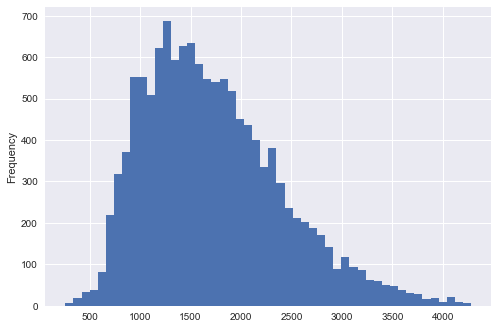

In [8]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [9]:
print(df['sqft_lot'].sort_values(ascending = False))

4878     161607
3543     159865
6256     156162
29835    155509
19787    154202
          ...  
13100       919
23894       917
6810        900
21237       800
17155       648
Name: sqft_lot, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

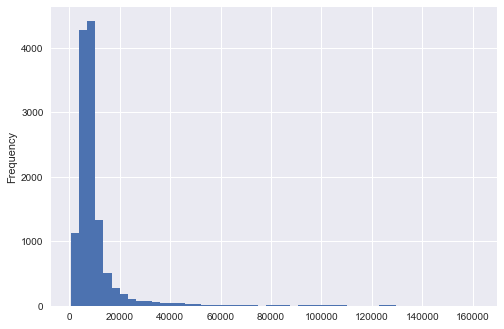

In [10]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [11]:
print(df['bedrooms'].sort_values(ascending = False))

21623    9
7766     9
11275    9
4089     9
9455     9
        ..
11471    0
12473    0
9487     0
14636    0
1310     0
Name: bedrooms, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

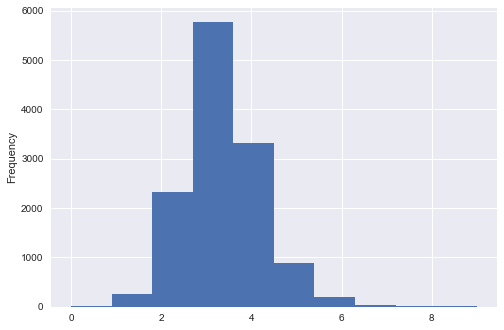

In [12]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [13]:
print(df['bathrooms'].sort_values(ascending = False))

657      7.5
21623    7.5
5089     6.5
28471    6.0
631      6.0
        ... 
3859     0.5
8468     0.0
1310     0.0
1952     0.0
29732    0.0
Name: bathrooms, Length: 12832, dtype: float64


<AxesSubplot:ylabel='Frequency'>

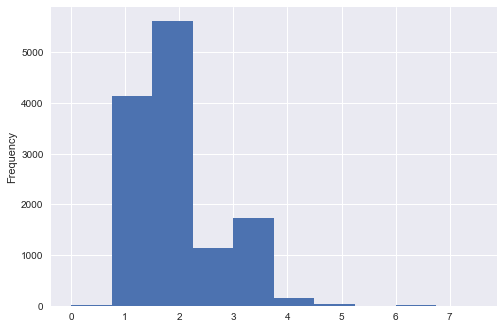

In [14]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [15]:
print(df['condition'].sort_values(ascending = False))

19705    5
7555     5
7630     5
3939     5
13908    5
        ..
17906    1
28129    1
26052    1
23335    1
2069     1
Name: condition, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

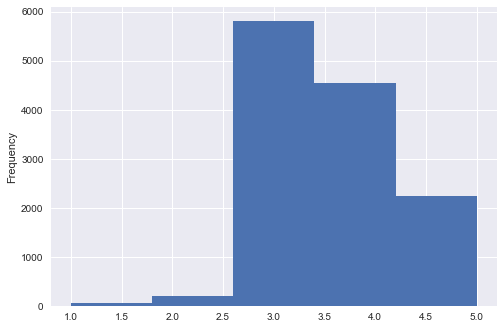

In [16]:
df['condition'].plot(kind = 'hist', bins = 5)

In [17]:
print(df['grade'].sort_values(ascending = False))

6903     12
10047    11
22845    11
1082     11
3945     11
         ..
28397     3
21804     3
8468      3
29732     3
9487      3
Name: grade, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

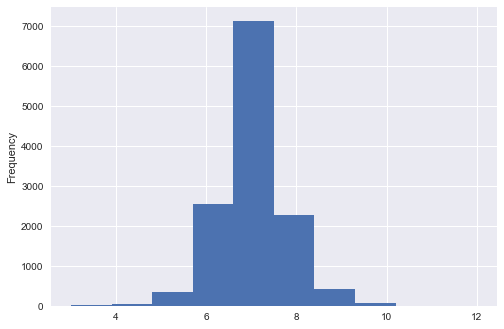

In [18]:
df['grade'].plot(kind = 'hist', bins = 10)

In [19]:
print(df['sqft_basement'].sort_values(ascending = False))

2907     1940
23898    1940
24839    1930
21590    1930
20798    1930
         ... 
16319       0
16324       0
16327       0
16339       0
0           0
Name: sqft_basement, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

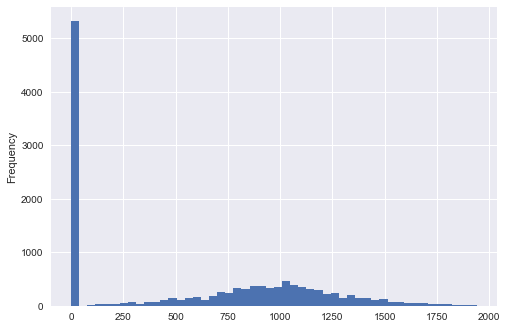

In [20]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [21]:
print(df['sqft_patio'].sort_values(ascending = False))

26205    940
19872    940
28878    940
24303    940
18763    940
        ... 
15156      0
15165      0
15169      0
15171      0
15128      0
Name: sqft_patio, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

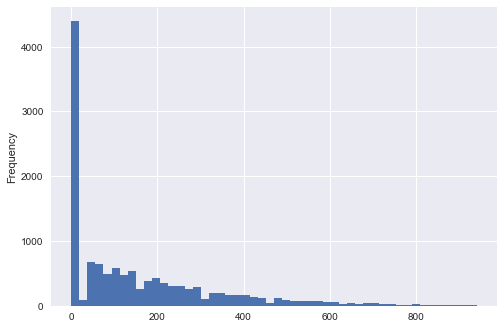

In [22]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [23]:
print(df['sqft_garage'].sort_values(ascending = False))

23968    780
1638     780
28423    780
9445     780
4451     780
        ... 
17291      0
17287      0
17280      0
17279      0
0          0
Name: sqft_garage, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

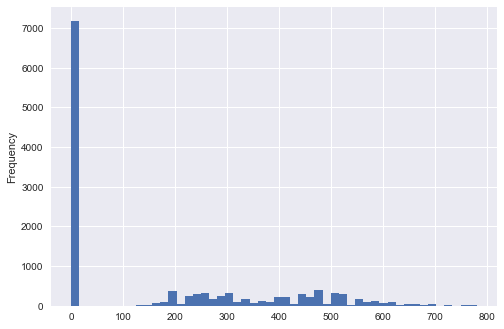

In [24]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

## Model Exploration

In [25]:

df = df.drop(['id', 'date', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system', 'address', 'age', 'state', 'zip'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,4,1.0,1180,4,7,0,0,40,0.250000
1,920000.0,5,2.5,2770,3,7,1570,0,240,0.500000
2,311000.0,6,2.0,2880,3,7,1580,0,0,0.333333
5,625000.0,2,1.0,1190,3,7,0,300,0,0.500000
6,1317227.0,3,3.0,2080,4,9,0,0,150,1.000000


In [26]:

df.corr()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
price,1.000000,0.283312,0.474756,0.552702,0.108144,0.566275,0.341234,0.089480,0.237373,0.270852
bedrooms,0.283312,1.000000,0.577259,0.648893,0.102478,0.389889,0.343126,0.168299,0.178665,-0.226574
bathrooms,0.474756,0.577259,1.000000,0.752647,0.188031,0.537416,0.417789,0.225588,0.301255,0.605769
sqft_living,0.552702,0.648893,0.752647,1.000000,0.115462,0.641682,0.571922,0.183282,0.349607,0.271819
condition,0.108144,0.102478,0.188031,0.115462,1.000000,0.069514,-0.012314,0.052330,0.093269,0.106581
grade,0.566275,0.389889,0.537416,0.641682,0.069514,1.000000,0.366947,0.289663,0.256443,0.232082
sqft_basement,0.341234,0.343126,0.417789,0.571922,-0.012314,0.366947,1.000000,0.098477,0.212417,0.178167
sqft_garage,0.089480,0.168299,0.225588,0.183282,0.052330,0.289663,0.098477,1.000000,0.103377,0.084024
sqft_patio,0.237373,0.178665,0.301255,0.349607,0.093269,0.256443,0.212417,0.103377,1.000000,0.180827
bath_to_bed,0.270852,-0.226574,0.605769,0.271819,0.106581,0.232082,0.178167,0.084024,0.180827,1.000000


<AxesSubplot:>

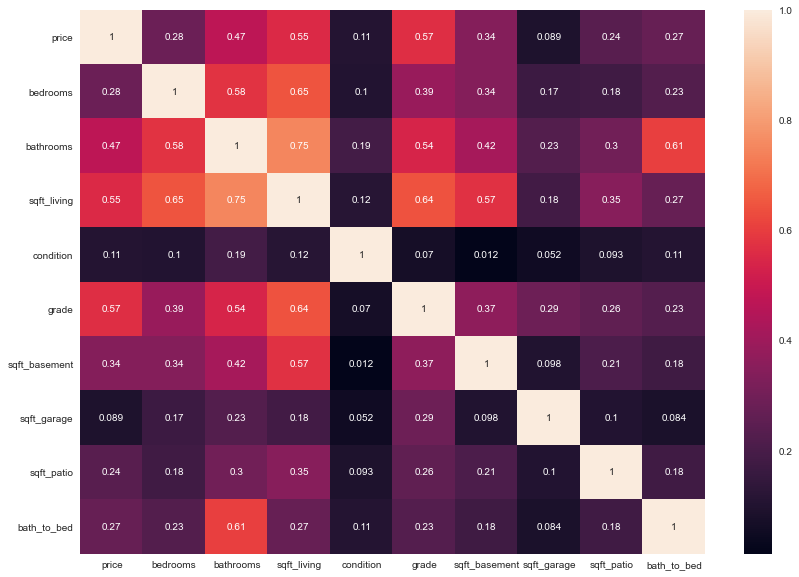

In [27]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [28]:
formula = "price ~ sqft_living"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     5643.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:30:00   Log-Likelihood:            -1.8479e+05
No. Observations:               12832   AIC:                         3.696e+05
Df Residuals:                   12830   BIC:                         3.696e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.063e+05   1.04e+04     19.794      0.000    1.86e+05    2.27e+05
sqft_living   421.7780      5.615     75.121      0.000     410.772     432.784
==============================================================================
Omnibus:                     3726.927   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15924.786
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                       7.719   Cond. No.                     5.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
formula = "price ~ sqft_living + grade + sqft_patio"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2652.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:30:00   Log-Likelihood:            -1.8403e+05
No. Observations:               12832   AIC:                         3.681e+05
Df Residuals:                   12828   BIC:                         3.681e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.034e+06   3.29e+04    -31.415      0.000    -1.1e+06   -9.69e+05
sqft_living   236.6874      7.127     33.210      0.000     222.717     250.658
grade        2.206e+05   5581.822     39.514      0.000     2.1e+05    2.32e+05
sqft_patio    104.8474     20.883      5.021      0.000      63.913     145.782
==============================================================================
Omnibus:                     3992.749   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20196.085
Skew:                           1.417   Prob(JB):                         0.00
Kurtosis:                       8.453   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
dflog = df.copy()

In [31]:
# dflog['bathbed'] = dflog['bathrooms'] / dflog['bedrooms']
# median_bathbed = dflog['bathbed'].median()
# dflog.replace([np.inf, -np.inf], median_bathbed, inplace=True)
# dflog.fillna(median_bathbed, inplace=True)
# dflog['bathbed'].value_counts()

In [32]:
#list for cols to scale
cols_to_scale = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'bedrooms', 'bathrooms']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(dflog[cols_to_scale])

#scale selected data
dflog[cols_to_scale] = scaler.transform(dflog[cols_to_scale])
dflog


,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,0.761142,-1.104775,-0.799221,4,7,-1.048503,-0.799417,-0.632443,0.250000
1,920000.0,1.764117,0.841117,1.528026,3,7,1.818459,-0.799417,0.448518,0.500000
2,311000.0,2.767092,0.192486,1.689031,3,7,1.836720,-0.799417,-0.848635,0.333333
5,625000.0,-1.244808,-1.104775,-0.784584,3,7,-1.048503,0.601762,-0.848635,0.500000
6,1317227.0,-0.241833,1.489748,0.518089,4,9,-1.048503,-0.799417,-0.037915,1.000000
...,...,...,...,...,...,...,...,...,...,...
30140,2650000.0,0.761142,2.138379,2.259865,4,9,0.887153,-0.799417,-0.632443,0.875000
30143,725000.0,-0.241833,-1.104775,-0.067382,3,7,0.558457,0.321526,-0.848635,0.333333
30146,380000.0,-0.241833,-1.104775,-1.267598,4,6,-1.048503,-0.799417,-0.848635,0.333333
30150,1555000.0,1.764117,0.192486,0.269263,4,8,1.014979,-0.799417,0.286374,0.400000


In [33]:
dflog['b2bscaled'] = dflog['bathrooms'] * dflog['bedrooms']
dflog

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed,b2bscaled
0,675000.0,0.761142,-1.104775,-0.799221,4,7,-1.048503,-0.799417,-0.632443,0.250000,-0.840891
1,920000.0,1.764117,0.841117,1.528026,3,7,1.818459,-0.799417,0.448518,0.500000,1.483829
2,311000.0,2.767092,0.192486,1.689031,3,7,1.836720,-0.799417,-0.848635,0.333333,0.532628
5,625000.0,-1.244808,-1.104775,-0.784584,3,7,-1.048503,0.601762,-0.848635,0.500000,1.375234
6,1317227.0,-0.241833,1.489748,0.518089,4,9,-1.048503,-0.799417,-0.037915,1.000000,-0.360271
...,...,...,...,...,...,...,...,...,...,...,...
30140,2650000.0,0.761142,2.138379,2.259865,4,9,0.887153,-0.799417,-0.632443,0.875000,1.627610
30143,725000.0,-0.241833,-1.104775,-0.067382,3,7,0.558457,0.321526,-0.848635,0.333333,0.267171
30146,380000.0,-0.241833,-1.104775,-1.267598,4,6,-1.048503,-0.799417,-0.848635,0.333333,0.267171
30150,1555000.0,1.764117,0.192486,0.269263,4,8,1.014979,-0.799417,0.286374,0.400000,0.339569


## Good

In [34]:
target = dflog['price']
predictors = dflog.drop(['price', 'bath_to_bed'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     976.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:30:00   Log-Likelihood:            -1.8378e+05
No. Observations:               12832   AIC:                         3.676e+05
Df Residuals:                   12822   BIC:                         3.677e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.073e+05   4.44e+04    -18.196      0.000   -8.94e+05    -7.2e+05
bedrooms      -6.827e+04   4811.944    -14.188      0.000   -7.77e+04   -5.88e+04
bathrooms      5.335e+04   5774.862      9.239      0.000     4.2e+04    6.47e+04
sqft_living    1.497e+05   7116.047     21.041      0.000    1.36e+05    1.64e+05
condition      3.083e+04   4628.332      6.662      0.000    2.18e+04    3.99e+04
grade           2.31e+05   5698.381     40.540      0.000     2.2e+05    2.42e+05
sqft_basement  2.072e+04   4349.757      4.764      0.000    1.22e+04    2.92e+04
sqft_garage   -4.156e+04   3754.091    -11.072      0.000   -4.89e+04   -3.42e+04
sqft_patio      1.38e+04   3814.790      3.617      0.000    6322.151    2.13e+04
b2bscaled      2.022e+04   2847.879      7.100      0.000    1.46e+04    2.58e+04
==============================================================================
Omnibus:                     4245.648   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23710.935
Skew:                           1.483   Prob(JB):                         0.00
Kurtosis:                       8.962   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lr = LinearRegression()
lr.fit(predictors, target)
lr.score(predictors, target)

0.40668662383578735

In [36]:
y_hat = lr.predict(predictors)
y_hat

array([ 688359.11757017, 1162656.95371333, 1046930.24787559, ...,
        475109.92632342, 1159400.79216815,  699703.82008924])

In [37]:
y_hat = lr.predict(predictors)
resid = (target - y_hat)

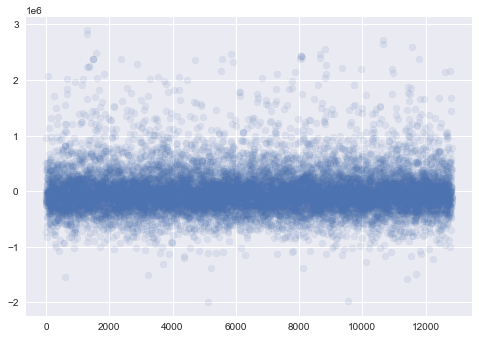

In [38]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

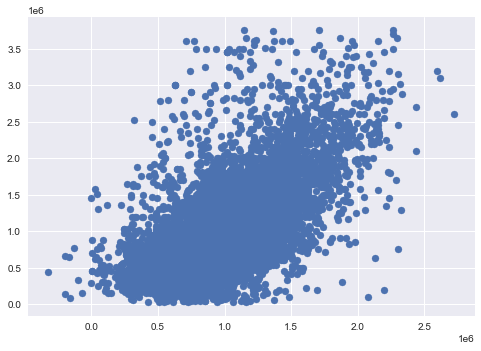

In [39]:
fig, ax = plt.subplots()

ax.scatter(y_hat, target)

In [40]:
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))

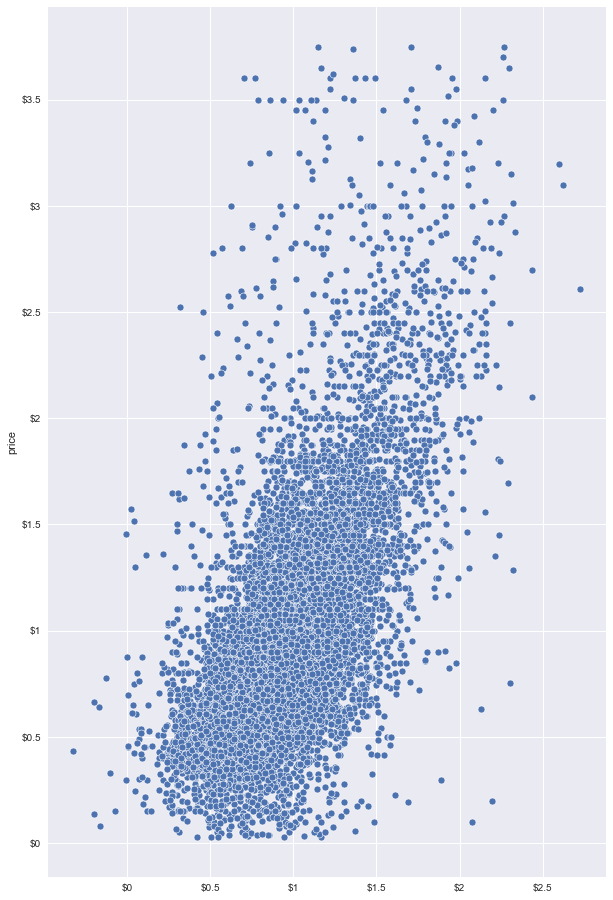

In [41]:
fig, ax = plt.subplots(figsize = (10,16))
sns.scatterplot(x = y_hat, y = target, ax=ax)
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)

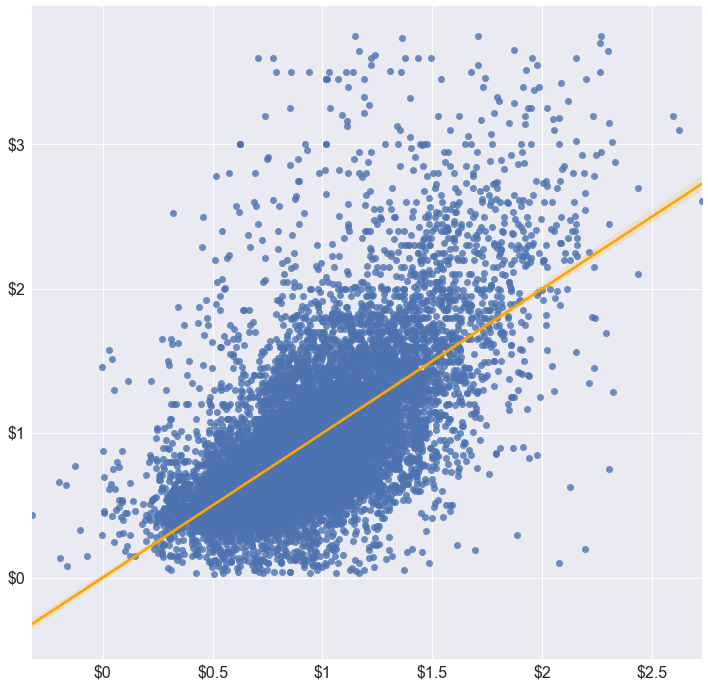

In [42]:
fig, ax = plt.subplots(figsize = (12,12))
sns.regplot(x = y_hat, y = target, line_kws={"color": "orange"})
ax.set(ylabel=None)
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
sns.set_style(style='white')

In [43]:
predictors.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'b2bscaled'],
      dtype='object')

## Presentation Calcs
sqft_living 1.497e+05, std = 713.6434149039003

condition 3.083e+04, std = 0.7895859397473242

grade 2.31e+05, std = 0.8685869710286127

sqft_basement 2.072e+04, std = 553.9285173565767

sqft_patio 1.38e+04, std= 193.89617631732378

bath_to_bed 2.607e+05, std = 0.21532773323288892

In [44]:
print(df['sqft_living'].std())
print(df['condition'].std())
print(df['grade'].std())
print(df['sqft_basement'].std())
print(df['sqft_patio'].std())
print(df['bath_to_bed'].std())

683.2371863146604
0.7891198494676135
0.8456102896895
547.6393182900987
185.0277495691004
0.21445290405953146


Add 400 sqft room = increase value by $85,000

Raise condition by 1 = $31,000

Raise grade by 1 = increase value by $231,000

Basement extensions = 37$ per sqft

Add medium patio of 168 sqft = $12,000

Add bathroom to a 3bed = $48,000

https://www.landscapingnetwork.com/patios/size.html

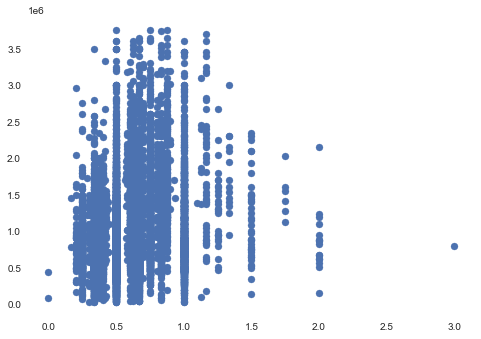

In [45]:
fig, ax = plt.subplots()

ax.scatter(df['bath_to_bed'], df['price'])

In [46]:
df['bedrooms'].mean()

3.2411159600997506

### Formula for Adding a Bathroom

In [47]:
a = 54480 # the coefficient of bathrooms_scaled
b = -75840 # the coefficient of bedrooms_scaled
c = 23060 # the coefficient of bathrooms_scaled*bedrooms_scaled
# d = number of bedrooms
# e = mean number of bedrooms in the dataset

In [48]:
d = 3
e = 3.25
a + c * (d - e)

48715.0